<a href="https://colab.research.google.com/github/riveramatthew/Predictive-Analytics/blob/main/Copy_of_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
new_df = df[['sex', 'salary']]

In [ ]:
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [ ]:
male_df = new_df[new_df['sex']=='Male']

In [ ]:
male_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [ ]:
male_df['salary'].median()

108043.0

Finding the Median salary for all females

In [ ]:
female_df = new_df[new_df['sex']=='Female']

In [ ]:
female_df.head()

,sex,salary
9,Female,129000
19,Female,137000
24,Female,74830
34,Female,80225
35,Female,77000


In [ ]:
female_df['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [ ]:
male_salary = male_df['salary'].mean()
male_salary

115090.41899441341

In [ ]:
female_salary = female_df['salary'].mean()
female_salary 

101002.41025641025

In [ ]:
# The difference between mean salaries of male and female
difference_salary = male_salary - female_salary
difference_salary

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
years_exp = df[df['yrs.service']>=20]

In [ ]:
len(years_exp)

157

In [ ]:
years_exp['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
twenty_more_exp = df[df['yrs.service']>=20]
twenty_more_exp

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [ ]:
twenty_less_exp = df[df['yrs.service']<20]
twenty_less_exp

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000
...,...,...,...,...,...,...,...
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292
393,394,Prof,A,31,19,Male,150564
395,396,Prof,A,25,15,Male,95329


People who have salary of greater than or equal to 200,000

In [ ]:
people_salary = df[df['salary']>=200000]

In [ ]:
people_salary

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


People who earn a salary greater than or equal to 200,000 are men. There are more people who have less then twenty years of experience. Those who have a salary greater than or equal to 200,000  are men who have greater than twenty years experience and have a phd too. 


# Rename values, subset columns, etc

# Create some simple visualizations showing some simple statistics

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


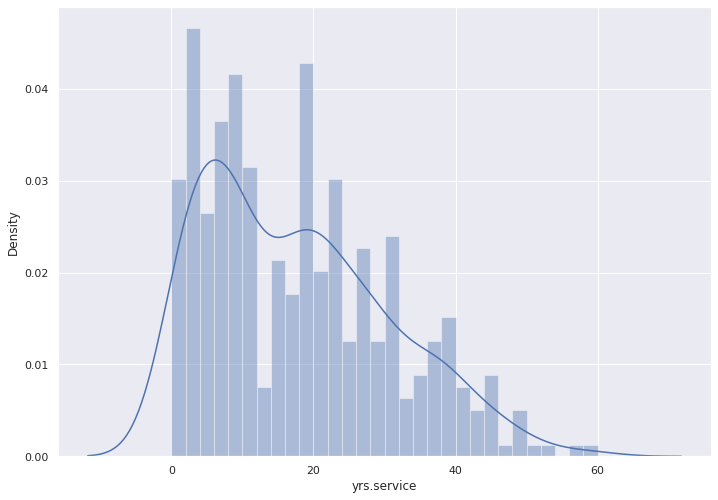

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['yrs.service'], bins=30)
plt.show()

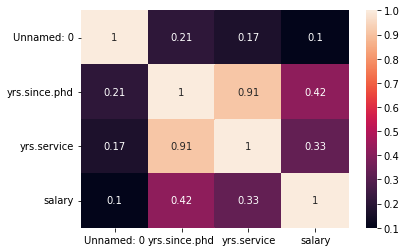

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

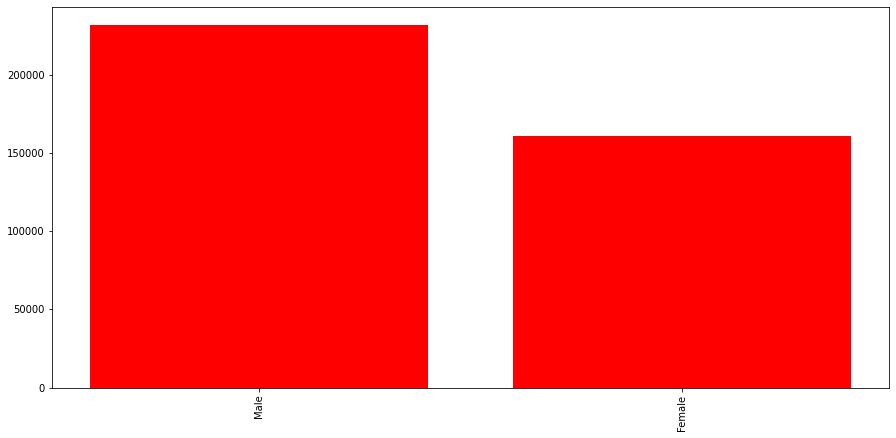

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=df['sex'], height=df['salary'], color='red')
plt.xticks(rotation=90)
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

People who earn a salary greater than or equal to 200,000 are men. There are more people who have less then twenty years of experience. Those who have a salary greater than or equal to 200,000  are men who have greater than twenty years experience and have a phd too. 



I also discovered that the -

That there are more people that has less than twenty years experience working.



